Tutorial for Reading DEM (digital elevation model) data into a matplotlib plot - created December 5


not finished - may be messy

### 1
Download DEM data

For Washington State 10m data:
http://gis.ess.washington.edu/data/raster/tenmeter/byquad/index.html
1. select area (ex: Yakima)
2. you will be taken into the files for that area, click on a square on the map to download the dem file. Or, scroll down and click the "DNR number" for the area you want to download it.
3. unzip the dem file


### 2
Imports and DEM to TIFF

In [1]:
#import things
import numpy as np #numpy for math
import rasterio as rio #rasterio for reading in DEM
from rasterio.plot import show #for plotting with rio
import matplotlib.pyplot as plt #for plotting (base of plotting)
from pyproj import Proj,transform,Geod #for plotting on DEM
import pandas as pd #pandas for reading in csvs when plotting locations

In [2]:
import yaml

with open('/home/smocz/expand_redpy/scripts/config.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

volc_lat_lon = config['volc_lat_lon']

A cell will be added here with how to convert from .dem to .tif

and how to merge .dem files

for now, I used ArcGIS, see instructions in DEM_notes.txt for now

### 3
Open and Show DEM (from .tif file)

In [ ]:
dem = rio.open("/home/smocz/expand_redpy_new_files/DEM_data/Rainier.tif") #open tif file (contains DEM) with rio
dem_array = dem.read(1).astype('float64') #set array for DEM
crs = dem.crs #get crs (coordinate reference systems)
dem_data_dict={'data':dem_array, 'crs':crs, 'left':dem.bounds[0], 'right':dem.bounds[2], 'bottom':dem.bounds[1], 'top':dem.bounds[3]}

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,12)) #make plot

show(dem_array, cmap='Greys_r', ax=ax) #show DEM, color map, ax is default
plt.axis() #show axis, put 'off' inside parenthesis to get rid of axis
plt.show() #show plot

### 4
Plot Points in lat, lon on the DEM

In [8]:
#transform locations and stations to UTM, takes a while so its in the outside cell

#############################################
# CURRENTLY GETTING STATIONS FROM ST HELENS #
#############################################

center_lat = volc_lat_lon['St_Helens'][0]
center_lon = volc_lat_lon['St_Helens'][1]

#get data for conversion and units
# crs = dem_data_dict['crs'] #get crs
# data = dem_data_dict['data'] #get data
# p2 = Proj(crs,preserve_units=False) #set up crs
# p1 = Proj(proj='latlong',preserve_units=False) #set up for latlong

#pull in location and stations to plot
loc_df = pd.read_csv(f'/home/smocz/expand_redpy_new_files/locations/St_Helens_Template_Locations.csv') #get locations
loc_lats = loc_df['Latitude'].values.tolist() #get a list of latitudes for template locations
loc_lons = loc_df['Longitude'].values.tolist() #get a list of longitudes for template locations


volc_md = pd.read_csv(f'/home/smocz/expand_redpy/csv_catalogs/Volcano_Metadata.csv') #read metadata
stas_lats = volc_md[volc_md['Volcano_Name']=='St_Helens']['Latitude'].values.tolist() #get latitude for stations at this volcano
stas_lons = volc_md[volc_md['Volcano_Name']=='St_Helens']['Longitude'].values.tolist() #get latitude for stations at this volcano

# loc_eastings = [] #eastings for locations, from longitude
# loc_northings = [] #northings for locations, from latitude
# stas_eastings = [] #eastings for stations, from longitude
# stas_northings = [] #northings for stations, from latitude
# for ll,l in enumerate(loc_lats):
# #     print(f' loc lon_lat: {loc_lons[ll]}, {l}')
#     loc_easting, loc_northing = transform(p1,p2,loc_lons[ll],l) #transform center of volcano to UTM
# #     print(f' loc UTM: {loc_easting}, {loc_northing}')
#     loc_eastings.append(loc_easting) #append to list
#     loc_northings.append(loc_northing) #append to list
# #     break
# for ll,l in enumerate(stas_lats):
#     sta_easting, sta_northing = transform(p1,p2,stas_lons[ll],l) #transform center of volcano to UTM
#     stas_eastings.append(sta_easting) #append to list
#     stas_northings.append(sta_northing) #append to list

In [35]:
print(f'min loc lat: {min(loc_lats)}, max loc lat: {max(loc_lats)}')
print(f'min loc lon: {min(loc_lons)}, max loc lon: {max(loc_lons)}')
print(len(loc_lats))
print(len(stas_lats))

min loc lat: 45.87370868860072, max loc lat: 46.46048461049731
min loc lon: -122.50971531531532, max loc lon: -121.7402056981345
1644
67


In [ ]:
# lat = 46.814988 #latitude of lower left corner
# lon = -121.816528 #longitude of lower left corner
# length = 8e3 #length in m for the edges of the graph
center_lat = volc_lat_lon['Rainier'][0]
center_lon = volc_lat_lon['Rainier'][1]


# left_x,bottom_y = transform(p1,p2,lon,lat) #transform lower left corner to UTM
center_eastings, center_northings = transform(p1,p2,center_lon,center_lat) #transform center of volcano to UTM

left, right = dem_data_dict['left'],dem_data_dict['right']
bottom, top = dem_data_dict['bottom'],dem_data_dict['top']
print(f'left: {left} | right: {right} | bottom: {bottom} | top: {top}')
print(f'center in UTM: {center_eastings}, {center_northings}')

fig,ax = plt.subplots(1,1,figsize=(8,11))
ax.imshow(data,extent=[left, right, bottom, top],cmap='gist_earth')
ax.set_title('Rainier')
ax.scatter(center_eastings, center_northings,marker='*',color='blue',s=100,label='Volcano Center')
ax.scatter(loc_eastings, loc_northings,marker='.',color='green',alpha=0.5,label='Template Locations')
ax.scatter(stas_eastings, stas_northings,marker='o',color='orange',label='Stations')


#crop/zoom-in on map
# ax.set_xlim(left+2000,right-2500)
# ax.set_ylim(bottom+0.005e6,top-0.01e6)

In [ ]:
print('min lat:',min(stas_lats),'max lat:',max(stas_lats))
print('min lon:',min(stas_lons),'max lon:',max(stas_lons))

attempt at using .tif form gmrt.org

In [20]:
dem = rio.open("/home/smocz/expand_redpy_new_files/DEM_data/St_Helens_lessbig.tif") #open tif file (contains DEM) with rio
dem_array = dem.read(1).astype('float64') #set array for DEM
crs = dem.crs #get crs (coordinate reference systems)
dem_data_dict={'data':dem_array, 'crs':crs, 'left':dem.bounds[0], 'right':dem.bounds[2], 'bottom':dem.bounds[1], 'top':dem.bounds[3]}

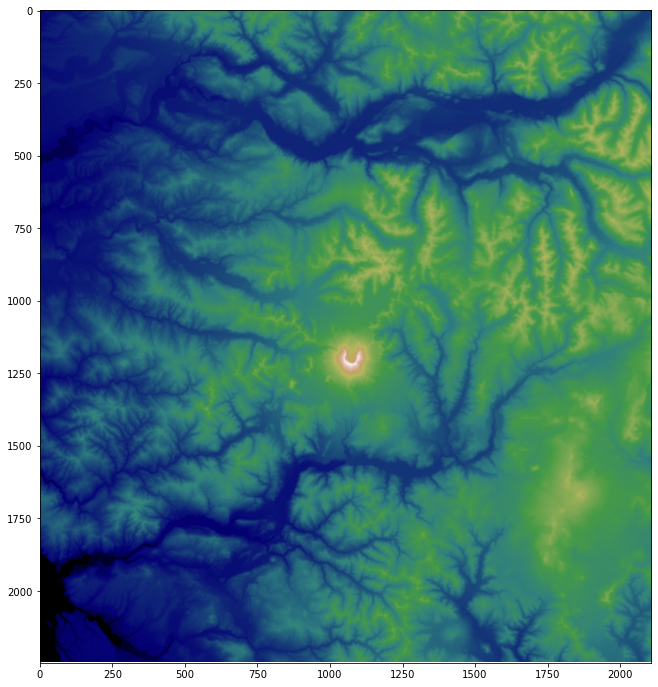

In [21]:
fig, ax = plt.subplots(1, figsize=(12,12)) #make plot

show(dem_array, cmap='gist_earth', ax=ax) #show DEM, color map, ax is default

plt.axis() #show axis, put 'off' inside parenthesis to get rid of axis
plt.show() #show plot

In [41]:
#reading pnsn data
one = pd.read_csv('/home/smocz/expand_redpy_new_files/pnsn_Helens_next_10000.csv')
two = pd.read_csv('/home/smocz/expand_redpy_new_files/pnsn_Helens_latest_10000.csv')
three = pd.read_csv('/home/smocz/expand_redpy_new_files/pnsn_Helens_final_few.csv')

pnsn = pd.concat([one,two,three])

pnsn = pnsn.drop_duplicates(ignore_index=True) #ignore overlap between csvs
#should be 20,064 events

20064
20064


,Evid,Magnitude,Magnitude Type,Epoch(UTC),Time UTC,Time Local,Distance From,Lat,Lon,Depth Km,Depth Mi
0,10680698,2.2,d,1.129074e+09,2005/10/11 23:31:59,2005/10/11 16:31:59 PDT,"0.2 km from Mt St Helens, WA",46.1983,-122.1948,-0.5,-0.3
1,10680678,0.0,d,1.129070e+09,2005/10/11 22:38:07,2005/10/11 15:38:07 PDT,"0.5 km from Mt St Helens, WA",46.1960,-122.1868,-1.9,-1.2
2,10680628,1.7,d,1.129066e+09,2005/10/11 21:19:10,2005/10/11 14:19:10 PDT,"0.2 km from Mt St Helens, WA",46.1975,-122.1948,-1.3,-0.8
3,10680383,1.3,d,1.129049e+09,2005/10/11 16:40:29,2005/10/11 09:40:29 PDT,"0.4 km from Mt St Helens, WA",46.1960,-122.1880,-1.9,-1.2
4,10680358,1.6,d,1.129045e+09,2005/10/11 15:35:23,2005/10/11 08:35:23 PDT,"0.1 km from Mt St Helens, WA",46.1977,-122.1908,-1.6,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
20059,10549083,0.1,d,1.010214e+09,2002/01/05 06:51:52,2002/01/04 22:51:52 PST,"1.1 km from Mt St Helens, WA",46.2010,-122.1785,3.2,2.0
20060,10548983,0.2,d,1.010148e+09,2002/01/04 12:44:00,2002/01/04 04:44:00 PST,"7.8 km from Mt St Helens, WA",46.1285,-122.1840,13.1,8.1
20061,10547698,-0.2,d,1.009948e+09,2002/01/02 05:00:12,2002/01/01 21:00:12 PST,"30.0 km from Mt St Helens, WA",45.9397,-122.0820,5.2,3.2
20062,10547688,-1.1,d,1.009947e+09,2002/01/02 04:42:52,2002/01/01 20:42:52 PST,"0.8 km from Mt St Helens, WA",46.2002,-122.2023,4.7,2.9


In [42]:
pnsn_lat = pnsn['Lat'].values.tolist()
pnsn_lon = pnsn['Lon'].values.tolist()

print(pnsn_lat[0])

46.1983


left: -122.77798474949573 | right: -121.61947618800427 | bottom: 45.79912835853098 | top: 46.65377401778216
center: -122.1944, 46.1912


(45.849128358530976, 46.50377401778216)

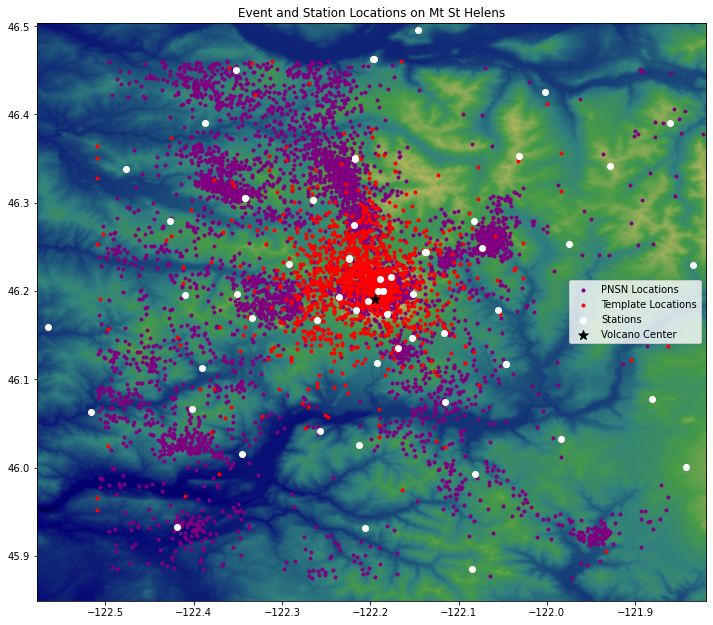

In [44]:
# lat = 46.814988 #latitude of lower left corner
# lon = -121.816528 #longitude of lower left corner
# length = 8e3 #length in m for the edges of the graph

crs = dem_data_dict['crs'] #get crs
data = dem_data_dict['data'] #get data

center_lat = volc_lat_lon['St_Helens'][0]
center_lon = volc_lat_lon['St_Helens'][1]


# left_x,bottom_y = transform(p1,p2,lon,lat) #transform lower left corner to UTM
# center_eastings, center_northings = transform(p1,p2,center_lon,center_lat) #transform center of volcano to UTM

left, right = dem_data_dict['left'],dem_data_dict['right']
bottom, top = dem_data_dict['bottom'],dem_data_dict['top']
print(f'left: {left} | right: {right} | bottom: {bottom} | top: {top}')
print(f'center: {center_lon}, {center_lat}')

fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.imshow(data,extent=[left, right, bottom, top],cmap='gist_earth')
ax.set_title('Event and Station Locations on Mt St Helens')
ax.scatter(pnsn_lon, pnsn_lat,marker='.',color='purple',label='PNSN Locations') #,alpha=0.5
ax.scatter(loc_lons, loc_lats,marker='.',color='red',label='Template Locations') #,alpha=0.5
ax.scatter(stas_lons, stas_lats,marker='o',color='white',label='Stations')
ax.scatter(center_lon, center_lat,marker='*',color='black',s=100,label='Volcano Center')
ax.legend()

#crop/zoom-in on map
ax.set_xlim(left+.2,right-0.2)
ax.set_ylim(bottom+0.05,top-.15)


### ISSUE: IT SQUISHES WITH THE DIMENSIONS
### THE SCATTERS ALINE WITH THE AXES, THE MAP DOES NOT